In [2]:
'''
Electro_fF_GR: This program calculates the energy conditions
for a f(F) lagrangian for electrodynamics. As an example,
SEC condition is saturated and an exponential lagrangian
is used as test.'''
__author__ = 'Daniel Forero'
from sympy import *
init_printing()
from sympy.diffgeom import *
from sympy.tensor.array import Array, tensorproduct
from IPython.display import display

In [3]:
M = Manifold('M', 4)
P = Patch('P', M)
R3_CS = CoordSystem('R3_CS', P, ['t', 'x', 'y', 'z'])
e_0, e_1, e_2, e_3 = R3_CS.base_vectors()
dx0, dx1, dx2, dx3 = R3_CS.base_oneforms()
x0, x1, x2, x3 = R3_CS.coord_functions()

TP=TensorProduct
R3_Metric = -TP(dx0, dx0) + TP(dx1, dx1) + TP(dx2,dx2) + TP(dx3, dx3)
R3_Metric
R3_ch = metric_to_Christoffel_2nd(R3_Metric)
R3_Ricci = metric_to_Ricci_components(R3_Metric)
display(R3_Metric)

In [54]:
#Define a metric
#Mink
g_00 = -1
g_11 = 1
g_22 = 1
g_33 = 1
'''
#Schwarzchild
M, r, th, phi = symbols('M, r, theta, phi')
f =1-(2*M/r)
display(f)
g_00 = -f
g_11 = f**-1
g_22 = r**2
g_33 = r**2*sin(th)
'''
g = Matrix([[g_00, 0, 0, 0], [0, g_11, 0, 0], [0, 0, g_22, 0], [0, 0, 0, g_33]])
#Define symbols for vectors.
a, b, c, d = symbols('a b c d')
#Lightlike
l_con = Matrix([[a], [1], [0], [0]])
l_cov = g.inv()*l_con
light_sol = solve(l_con.dot(l_cov), a, dict=True)
a = light_sol[1][a]
l_con = Matrix([[a], [1], [0], [0]])
l_cov = g.inv()*l_con
#Timelike
t_con = Matrix([[b], [0], [0], [0]])
t_cov = g.inv()*t_con
time_sol = solve(t_con.dot(t_cov)+1, b, dict=True)
b = time_sol[1][b]
t_con = Matrix([[b], [0], [0], [0]])
t_cov = g.inv()*t_con


In [55]:

#Symbols for field components.
Ex, Ey, Ez, Bx, By, Bz = symbols('E_x E_y E_z B_x B_y B_z', positive=True)
#Define F tensor according to convention in Carroll's notes.
Fcov = Matrix([[0, -Ex, -Ey, -Ez],[Ex,0,Bz,-By],[Ey,-Bz,0,Bx],[Ez,By,-Bx,0]]) #contra contravariante
Fcon = g.inv()*Fcov*g.inv()
#Calculate F scalar
F_scalar = 0
for m in range(4):
    for n in range(4):
        F_scalar+=Fcov[m,n]*Fcon[m,n]
display(F_scalar)
#Calculate other forms of the F tensor
Fconcov = Matrix(g.inv()*Fcov)
Fcovcon = Matrix(Fcov*g.inv())
Fcov

⎡ 0   -Eₓ   -E_y  -E_z⎤
⎢                     ⎥
⎢Eₓ    0    B_z   -B_y⎥
⎢                     ⎥
⎢E_y  -B_z   0     Bₓ ⎥
⎢                     ⎥
⎣E_z  B_y   -Bₓ    0  ⎦

In [57]:
#Calculate usual T tensor with cross-index F form
Tusual=MutableMatrix(zeros(4))
for m in range(4):
    for n in range(4):
        term = 0
        for b in range(4):
            term+=Fcov[m,b]*Fcovcon[n, b]
        Tusual[m,n]=nsimplify(term - (1./4)*g[m,n]*F_scalar)
Tusual



⎡  2      2      2     2      2      2                                        
⎢Bₓ    B_y    B_z    Eₓ    E_y    E_z                                         
⎢─── + ──── + ──── + ─── + ──── + ────             B_y⋅E_z - B_z⋅E_y          
⎢ 2     2      2      2     2      2                                          
⎢                                                                             
⎢                                           2      2      2     2      2      
⎢                                         Bₓ    B_y    B_z    Eₓ    E_y    E_z
⎢          B_y⋅E_z - B_z⋅E_y            - ─── + ──── + ──── - ─── + ──── + ───
⎢                                          2     2      2      2     2      2 
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢          -Bₓ⋅E_z + B_z⋅Eₓ                        -

In [58]:
#Calculate usual T tensor using only covariant F.
Tusual=MutableMatrix(zeros(4))
for m in range(4):
    for n in range(4):
        term = 0
        for b in range(4):
            for a in range(4):
                term+=g[a,b]*Fcov[a,m]*Fcov[b,n]
        Tusual[m,n]=nsimplify(term - (1./4)*g[m,n]*F_scalar)
display(Tusual)
#Calculate the trace.
T_trace = 0
for m in range(4):
    for n in range(4):
        T_trace += g[m,n]*Tusual[m,n]
display(T_trace)

⎡  2      2      2     2      2      2                                        
⎢Bₓ    B_y    B_z    Eₓ    E_y    E_z                                         
⎢─── + ──── + ──── + ─── + ──── + ────             B_y⋅E_z - B_z⋅E_y          
⎢ 2     2      2      2     2      2                                          
⎢                                                                             
⎢                                           2      2      2     2      2      
⎢                                         Bₓ    B_y    B_z    Eₓ    E_y    E_z
⎢          B_y⋅E_z - B_z⋅E_y            - ─── + ──── + ──── - ─── + ──── + ───
⎢                                          2     2      2      2     2      2 
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢          -Bₓ⋅E_z + B_z⋅Eₓ                        -

In [59]:
#Calculate the T tensor for f(F) lagrangian.
T=MutableMatrix(zeros(4))
f=Function('f')
F=symbols('F')
f=f(F)
for m in range(4):
    for n in range(4):
        term = 0
        for b in range(4):
            for a in range(4):
                term+=g[a,b]*Fcov[a,m]*Fcov[b,n]
        T[m,n]=nsimplify(-4*term*diff(f,F) + g[m,n]*f)
T

⎡⎛      2        2        2⎞ d                                              d 
⎢⎝- 4⋅Eₓ  - 4⋅E_y  - 4⋅E_z ⎠⋅──(f(F)) - f(F)       (-4⋅B_y⋅E_z + 4⋅B_z⋅E_y)⋅──
⎢                            dF                                             dF
⎢                                                                             
⎢                              d              ⎛       2        2       2⎞ d   
⎢     (-4⋅B_y⋅E_z + 4⋅B_z⋅E_y)⋅──(f(F))       ⎝- 4⋅B_y  - 4⋅B_z  + 4⋅Eₓ ⎠⋅──(f
⎢                              dF                                         dF  
⎢                                                                             
⎢                            d                                            d   
⎢      (4⋅Bₓ⋅E_z - 4⋅B_z⋅Eₓ)⋅──(f(F))               (4⋅Bₓ⋅B_y + 4⋅Eₓ⋅E_y)⋅──(f
⎢                            dF                                           dF  
⎢                                                                             
⎢                             d                     

In [61]:
#Check that f(F)=-(1/4)F leads to usual T.
T.subs(f, -F/4).doit().subs(F, F_scalar)==Tusual

True

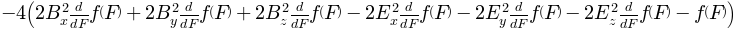

In [62]:
#Calculate the trace.
T_trace = 0
for m in range(4):
    for n in range(4):
        T_trace += g[m,n]*T[m,n]
#factor(T_trace).subs(f, -F/4).doit().subs(F, F_scalar)
factor(T_trace)

# SEC

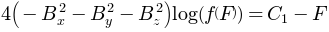

In [71]:
k=symbols('kappa')
SEC = nsimplify(Matrix(T.dot(t_con)).dot(t_con) + (1./2)*T_trace)
#factor(SEC).subs(f, -F/4).doit().subs(F, F_scalar) #SEC se cumple en el caso usual
display(simplify(factor(SEC)))
dsolve(simplify(factor(SEC)),f)

# NEC

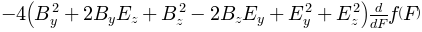

In [67]:
NEC = nsimplify(Matrix(T.dot(l_con)).dot(l_con))
#factor(NEC).subs(f, -F/4).doit().subs(F, F_scalar)
factor(NEC)

# DEC

In [68]:
#Calculate the 
Tcovcon=MutableMatrix(zeros(4))
for n in range(4):
    for m in range(4):
        s=0
        for l in range(4):
            s+=T[l,m]*g.inv()[l,n]
                
        Tcovcon[n,m]=s
Tcovcon

⎡  ⎛      2        2        2⎞ d                                              
⎢- ⎝- 4⋅Eₓ  - 4⋅E_y  - 4⋅E_z ⎠⋅──(f(F)) + f(F)      -(-4⋅B_y⋅E_z + 4⋅B_z⋅E_y)⋅
⎢                              dF                                             
⎢                                                                             
⎢                               d               ⎛       2        2       2⎞ d 
⎢      (-4⋅B_y⋅E_z + 4⋅B_z⋅E_y)⋅──(f(F))        ⎝- 4⋅B_y  - 4⋅B_z  + 4⋅Eₓ ⎠⋅──
⎢                               dF                                          dF
⎢                                                                             
⎢                             d                                             d 
⎢       (4⋅Bₓ⋅E_z - 4⋅B_z⋅Eₓ)⋅──(f(F))                (4⋅Bₓ⋅B_y + 4⋅Eₓ⋅E_y)⋅──
⎢                             dF                                            dF
⎢                                                                             
⎢                              d                    

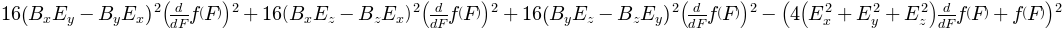

In [69]:
DEC=0
for m in range(4):
    for n in range(4):
        for l in range(4):
            DEC+=T[m,n]*Tcovcon[n,l]*t_con[m]*t_con[l]
simplify(DEC)

# WEC

In [70]:
WEC = nsimplify(Matrix(T.dot(t_con)).dot(t_con))
simplify(factor(WEC))#.subs(f, a*exp(F/(4*(Bx**2+By**2+Bz**2)))).doit())

## $f$ Exponencial

'WEC'

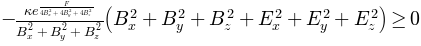

'NEC'

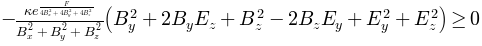

'SEC'

'DEC'

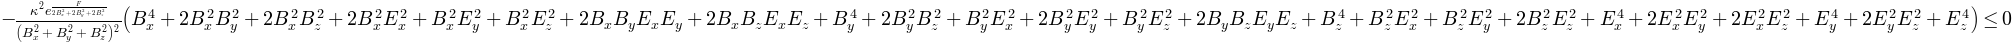

In [77]:
display('WEC',simplify(factor(WEC).subs(f, k*exp(F/(4*(Bx**2+By**2+Bz**2)))).doit())>=0)
display('NEC',simplify(factor(NEC).subs(f, k*exp(F/(4*(Bx**2+By**2+Bz**2)))).doit())>=0)
display('SEC',simplify(factor(SEC).subs(f, k*exp(F/(4*(Bx**2+By**2+Bz**2)))).doit().subs(F,F_scalar))>=0)
display('DEC',factor(simplify(factor(DEC).subs(f, k*exp(F/(4*(Bx**2+By**2+Bz**2)))).doit()))<=0)


In [78]:
#Factor DEC in terms of B, E and S
Bsq = Bx**2+By**2+Bz**2
Esq = Ex**2+Ey**2+Ez**2
expand((Bsq+Esq)**2)

In [79]:
fac = simplify(factor(simplify(factor(DEC).subs(f, a*exp(F/(4*(Bx**2+By**2+Bz**2)))).doit()))\
*(a*exp(F/(4*(Bx**2+By**2+Bz**2))))**(-2)*Bsq**2)
simplify(expand((Bsq+Esq)**2)+fac)

In [80]:
Bmat = Matrix([[Bx],[By],[Bz]])
Emat = Matrix([[Ex],[Ey],[Ez]])
S=Emat.cross(Bmat)
expand(S.dot(S))

In [81]:
simplify(expand((Bsq+Esq)**2)+fac)-expand(S.dot(S))